# Tree Models

### Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import preprocessing
from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor

/Users/leforestierlucas/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


### Dataframe

In [10]:
df = pd.read_csv("data/final_data.csv")
df

,Tm,Year,PTS_1,VORP_1,PER_1,WS_1,PTS_2,VORP_2,PER_2,WS_2,...,NRtg_2,SRS_2,WinLoss_1,NRtg_1,SRS_1,Rest,B2B,distLB,distUB,WinLoss
0,BOS,1984,0.722218,1.445467,0.439962,1.151077,1.084341,1.733788,0.145440,0.984298,...,1.560378,1.631836,1.134881,1.120777,1.170642,1.244913,-0.368426,-0.359567,0.043129,0.756
1,NJN,1984,-0.663271,-0.349592,-0.982110,-0.497881,-0.305562,-0.929770,-1.083423,-1.080527,...,0.168776,0.223381,0.607876,0.581578,0.607197,1.244913,-0.881990,-0.736498,-0.606690,0.549
2,NYK,1984,-0.941947,-0.510126,-0.788466,-0.509214,0.405433,-0.385286,-0.783936,-0.415986,...,-0.661303,-0.552811,0.229672,0.519363,0.565542,-0.544649,0.401919,-0.657416,-0.641871,0.573
3,WSB,1984,0.433828,2.233541,2.424811,2.596040,-0.036195,0.468230,0.479706,0.680508,...,0.217604,0.272215,0.074670,-0.019837,0.043753,-0.544649,0.145138,-1.147874,-0.891759,0.427
4,ATL,1984,-0.340880,-0.977133,-1.989662,-1.319527,-1.051179,-1.400676,-1.759683,-1.664374,...,0.119947,0.207960,0.149071,-0.206483,-0.157948,-0.544649,0.915483,0.116833,-0.361622,0.488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086,MEM,2023,0.067640,0.845879,1.134010,1.035847,-1.045594,-0.503707,0.326551,-0.022412,...,0.204566,0.225057,1.298097,1.172994,1.149034,0.038747,-1.149863,0.795401,-0.581626,0.622
1087,OKC,2023,-1.312853,-1.257580,-0.693006,-1.678403,-0.619872,-1.770553,1.022616,-2.085271,...,-2.144903,-2.131412,-1.467331,-1.665226,-1.690033,-0.007749,-0.308500,0.690877,-0.610994,0.488
1088,BRK,2023,0.401660,-0.131785,-1.014426,-0.511134,0.209203,0.349475,-0.767264,0.203655,...,0.913457,0.892021,0.262834,0.165220,0.175579,-0.193734,0.532864,-1.076320,-0.404584,0.549
1089,NOP,2023,0.053761,-0.131785,0.152835,-0.145484,0.608949,0.478745,0.373346,0.472109,...,-0.058737,-0.042150,-0.432069,-0.204983,-0.179572,0.038747,-1.149863,-0.013805,0.039575,0.512


In [15]:
result = df[df.isna().any(axis=1)]
result

,Tm,Year,PTS_1,VORP_1,PER_1,WS_1,PTS_2,VORP_2,PER_2,WS_2,...,NRtg_2,SRS_2,WinLoss_1,NRtg_1,SRS_1,Rest,B2B,distLB,distUB,WinLoss
33,IND,1985,-0.817388,-0.131950,1.213001,0.400510,0.201578,1.112965,2.771739,1.475932,...,-1.201928,-1.175217,-1.596702,-1.464911,-1.375584,-1.813585,0.573171,-1.494588,-1.180655,0.268
42,DAL,1985,0.240020,0.343378,0.079482,0.200103,0.908619,1.163243,1.657191,1.582008,...,-0.082052,-0.153563,0.209833,0.120640,0.048696,-0.323855,1.514809,0.457014,0.086271,0.537
43,LAC,1985,-0.636748,0.818707,0.313801,0.320347,-1.121982,-0.455699,-0.886265,-0.698618,...,NaN,NaN,NaN,NaN,NaN,-0.323855,0.259292,1.104721,0.979430,0.378
63,DAL,1986,0.322186,0.454476,0.779593,0.865044,0.681597,0.622253,0.330266,0.479609,...,0.120640,0.048696,0.253306,0.529112,0.458482,-0.242617,0.253359,0.630336,0.423311,0.537
64,LAC,1986,-1.074732,-1.279458,-0.956076,-0.982758,0.004696,0.318463,-0.059893,0.526960,...,NaN,NaN,-0.833946,-1.082276,-1.156989,1.152429,1.548305,0.605336,0.614737,0.390
65,SAC,1986,1.717834,-0.744693,-0.388488,-0.520808,1.259882,-1.048596,-0.323421,-1.114544,...,NaN,NaN,NaN,NaN,NaN,-0.242617,-0.717850,1.226767,1.096383,0.451
86,LAC,1987,-0.226510,-1.256374,-0.585721,-0.937039,-1.147576,-1.253901,-0.720343,-1.160970,...,-1.082276,-1.156989,-0.765945,-1.604312,-1.691874,1.067107,-1.087033,0.442984,0.724600,0.146
87,SAC,1987,-0.000606,-0.717137,0.071358,-0.646689,1.306014,-0.927210,-0.638673,-0.696933,...,NaN,NaN,-0.341361,-0.721890,-0.789915,-0.160066,-2.036467,0.782360,1.113505,0.354
109,SAC,1988,-0.857997,-0.645024,-0.407076,-0.321133,-0.655975,-0.593509,-0.106596,-0.631271,...,-0.721890,-0.789915,-0.945936,-0.660005,-0.725376,-0.936382,-0.441386,1.071992,1.094917,0.293
132,CHH,1989,-2.348705,-1.215221,-1.493327,-1.478061,-1.662953,-0.818039,-0.670487,-0.618285,...,NaN,NaN,NaN,NaN,NaN,0.914286,-0.282112,-0.616882,-0.756936,0.244


In [3]:
first_df = df[(df.Year <= 2013)]
y_train = np.array(first_df.WinLoss)
X_train = first_df.drop(["WinLoss", "Year", "Tm"], axis = 1)
second_df = df[(df.Year >= 2014)]
y_test = np.array(second_df.WinLoss)
X_test = second_df.drop(["WinLoss", "Year", "Tm"], axis = 1)

In [4]:
X_train

,PTS_1,VORP_1,PER_1,WS_1,PTS_2,VORP_2,PER_2,WS_2,PTS_3,VORP_3,...,WinLoss_2,NRtg_2,SRS_2,WinLoss_1,NRtg_1,SRS_1,Rest,B2B,distLB,distUB
0,0.722218,1.445467,0.439962,1.151077,1.084341,1.733788,0.145440,0.984298,0.715737,0.035971,...,1.754897,1.560378,1.631836,1.134881,1.120777,1.170642,1.244913,-0.368426,-0.359567,0.043129
1,-0.663271,-0.349592,-0.982110,-0.497881,-0.305562,-0.929770,-1.083423,-1.080527,-0.108131,-0.755387,...,0.242526,0.168776,0.223381,0.607876,0.581578,0.607197,1.244913,-0.881990,-0.736498,-0.606690
2,-0.941947,-0.510126,-0.788466,-0.509214,0.405433,-0.385286,-0.783936,-0.415986,0.435555,-0.442524,...,-0.641327,-0.661303,-0.552811,0.229672,0.519363,0.565542,-0.544649,0.401919,-0.657416,-0.641871
3,0.433828,2.233541,2.424811,2.596040,-0.036195,0.468230,0.479706,0.680508,-0.820259,1.195401,...,0.157414,0.217604,0.272215,0.074670,-0.019837,0.043753,-0.544649,0.145138,-1.147874,-0.891759
4,-0.340880,-0.977133,-1.989662,-1.319527,-1.051179,-1.400676,-1.759683,-1.664374,-1.112782,-1.043711,...,0.078849,0.119947,0.207960,0.149071,-0.206483,-0.157948,-0.544649,0.915483,0.116833,-0.361622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.577451,1.352822,1.497999,1.547405,0.331596,0.363838,-0.451904,0.061443,0.321099,-0.448959,...,0.379678,0.486312,0.560480,0.775625,0.415679,0.511959,0.059640,-0.422367,0.543168,-0.459561
797,-1.131629,-0.900462,0.282478,-0.806454,-1.692092,-1.079236,-0.889976,-1.243118,-1.534270,-1.492597,...,0.379678,0.189867,0.281339,-1.165038,-0.789789,-0.654743,0.137583,-0.038397,0.117796,-0.072959
798,-1.622123,-2.536407,-2.141196,-2.527112,-1.506262,-1.529026,0.635359,-1.115844,-1.480955,-1.543923,...,-0.529060,-0.847694,-0.896768,-2.522862,-2.888967,-2.939710,-1.327757,1.113512,-0.433073,-0.841319
799,1.572132,1.846692,0.297212,1.423518,1.685933,2.331667,1.706788,2.105785,0.915183,1.107943,...,1.064343,0.803933,0.837423,1.358464,1.288604,1.356449,-0.657441,-1.574275,0.757933,-0.613497


In [8]:
np.any(np.isnan(X_train))

True

## XGBoost

In [27]:
tscv = TimeSeriesSplit(n_splits=4, test_size=200, gap = 0)

num_estimators= [i for i in range(20, 121, 20)]
max_depth = [3, 4, 5, 6]
alpha = [0.5, 0.7, 1, 1.2, 1.5]
lam = [0.5, 0.7, 1, 1.2, 1.5]
col_sampletree = [0.7, 0.8, 0.9, 1]
gamma = [0, 0.1, 0.2]

score = []
for num_esti in num_estimators:
    for md in max_depth:
        for a in alpha:
            for l in lam:
                for cst in col_sampletree:
                    for gam in gamma:
                        res = [num_esti, md, a, l, cst, gam]
                        rmse = []
                        ratio = 1
                        for train_index, test_index in tscv.split(X_train):
                            cv_train, cv_val = X_train.iloc[train_index], X_train.iloc[test_index]
                            cv_y_train, cv_y_val = y_train[train_index], y_train[test_index]
                            model = XGBRegressor(n_estimators = num_esti, max_depth = md, reg_alpha = a, reg_lambda = l,
                                                colsample_bytree = cst, gamma = gam, eta = 0.3)
                            model.fit(cv_train, cv_y_train) 
                            rmse.append(ratio*np.sqrt(mean_squared_error(model.predict(cv_val), cv_y_val)))
                            ratio +=1
                        res.append(np.sum(rmse)/10)
                        score.append(res)

In [23]:
def winloss_win(arr):
    return 82*np.array(arr)

num_estimators    40.00000
max_depth          5.00000
alpha              0.50000
lambda             0.70000
col_sampletree     1.00000
gamma              0.00000
rmse               0.14242
Name: 1821, dtype: float64


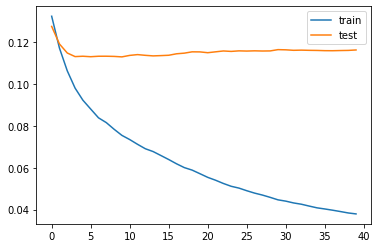

R2 score of the train set : 0.9242436456701252
R2 score of the train set : 0.00943485699816815
MAE score of the train set : 2.4032989247068484
MAE score of the test set : 7.5023747462305534


In [28]:
score = pd.DataFrame(score, columns = ["num_estimators", "max_depth", "alpha", "lambda", "col_sampletree", "gamma", "rmse"])
score.sort_values(by=['rmse'], ascending=False, inplace = True)
best_params = list(score.iloc[0, :])[:-1]
print(score.iloc[0, :])

evalset = [(X_train, y_train), (X_test,y_test)]
model = XGBRegressor(n_estimators = int(best_params[0]), max_depth = int(best_params[1]), 
                     reg_alpha = best_params[2], reg_lambda = best_params[3],
                     colsample_bytree = best_params[4], gamma = best_params[5], eta = 0.3)

model.fit(X_train, y_train, eval_set = evalset, verbose = 0)
results = model.evals_result()
plt.plot(results['validation_0']['rmse'], label='train')
plt.plot(results['validation_1']['rmse'], label='test')
# show the legend
plt.legend()
# show the plot
plt.show()

pred_train = winloss_win(model.predict(X_train))
pred_test = winloss_win(model.predict(X_test))
y_train_win = winloss_win(y_train)
y_test_win = winloss_win(y_test)

print(f"R2 score of the train set : {r2_score(pred_train, y_train_win)}")
print(f"R2 score of the train set : {r2_score(pred_test, y_test_win)}")
print(f"MAE score of the train set : {mean_absolute_error(pred_train, y_train_win)}")
print(f"MAE score of the test set : {mean_absolute_error(pred_test, y_test_win)}")

## RF

In [7]:
tscv = TimeSeriesSplit(n_splits=4, test_size=200, gap = 0)

num_estimators= [i for i in range(20, 121, 20)]
min_samples_split = [2, 3, 5, 7]
min_samples_leaf = [1, 3, 5]
max_features = ["sqrt", "log2", 1]

score = []
for num_esti in num_estimators:
    for mss in min_samples_split:
        for msl in min_samples_leaf:
            for mf in max_features:
                res = [num_esti, mss, msl, mf]
                rmse = []
                ratio = 1
                for train_index, test_index in tscv.split(X_train):
                    cv_train, cv_val = X_train.iloc[train_index], X_train.iloc[test_index]
                    cv_y_train, cv_y_val = y_train[train_index], y_train[test_index]
                    model = RandomForestRegressor(n_estimators = num_esti, min_samples_split = mss, 
                                                  min_samples_leaf = msl, max_features = mf)
                    model.fit(cv_train, cv_y_train) 
                    rmse.append(ratio*np.sqrt(mean_squared_error(model.predict(cv_val), cv_y_val)))
                    ratio +=1
                res.append(np.sum(rmse)/10)
                score.append(res)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').